In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import json
from collections import Counter
import seaborn as sns
import random

from matplotlib.lines import Line2D


%matplotlib inline

In [2]:
PROJECT = '557'
VERSION = '3.13'

SAMPLE_DICT = {
    '26993':'UnAmbiguouslyMapped_ds.soil',
    '26992':'UnAmbiguouslyMapped_ds.nycsm',
    '26991':'UnAmbiguouslyMapped_ds.hous2',
    '26990':'UnAmbiguouslyMapped_ds.hous1',
    '26989':'UnAmbiguouslyMapped_ds.gut',
    '26988':'UnAmbiguouslyMapped_ds.cityparks',
    '26987':'UnAmbiguouslyMapped_ds.buccal',
    '26986':'UnAmbiguouslyMapped_ds.7',
    '28839':'atcc_even',
    '28840':'atcc_staggered'   
}


truth_root = '~/code/metax_bakeoff_2019/plotting/truth_sets/species/'
TRUTH_DICT = {
    '26993':'UnAmbiguouslyMapped_ds.soil_TRUTH.txt',
    '26992':'UnAmbiguouslyMapped_ds.nycsm_TRUTH.txt',
    '26991':'UnAmbiguouslyMapped_ds.hous2_TRUTH.txt',
    '26990':'UnAmbiguouslyMapped_ds.hous1_TRUTH.txt',
    '26989':'UnAmbiguouslyMapped_ds.gut_TRUTH.txt',
    '26988':'UnAmbiguouslyMapped_ds.cityparks_TRUTH.txt',
    '26987':'UnAmbiguouslyMapped_ds.buccal_TRUTH.txt',
    '26986':'UnAmbiguouslyMapped_ds.7_TRUTH.txt',
    '28839':'atcc_even_TRUTH.txt',
    '28840':'atcc_staggered_TRUTH.txt' 
    
}

In [3]:
sns.set_palette(sns.color_palette("husl", 8))
accent_colors = sns.color_palette("Accent",10)

### Results using Cell Benchmarks script

idseq_ntnr_conc    0.967256
metaothello        0.966157
kraken2            0.963536
idseq_nr           0.963321
idseq_nt           0.962667
megablast          0.962250
kaiju              0.962247
kslam              0.959120
diamond            0.954356
kraken             0.954282
taxmaps            0.951783
bracken            0.950897
mmseqs2            0.949119
clark_s            0.946961
clark              0.946228
krakenhll          0.945764
prophyle           0.942846
gottcha            0.829810
pathseq            0.771482
metaphlan2         0.762259
motus2             0.587000
centrifuge         0.280247
karp               0.226117
dtype: float64


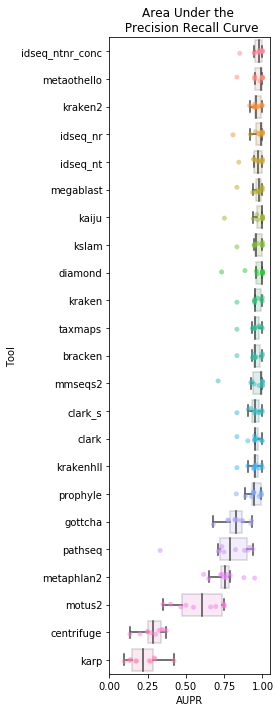

In [88]:
# these data were generated by 'Metagenomics Bench.ipynb' and saved for offline plotting.
df = pd.read_csv('data/output_aupr.csv', index_col = 0)

df.drop('idseq_ntnr_conc_stringent', axis=1,inplace=True) # no longer useful for analyses

# convert str values to float 
for col in df.columns:
    df[col] = df[col].astype(float)

print(df.mean().sort_values(ascending = False))
    
df = df[df.mean().sort_values(ascending = False).index]
keep_order = df.columns
plt.figure(figsize=(4,10))
sns.boxplot(y="variable", x="value", data=pd.melt(df), boxprops=dict(alpha=.2),showfliers=False)
sns.stripplot(y="variable", x="value", data=pd.melt(df), alpha=.5)
plt.xlim(0,1.05)
plt.title("Area Under the \n Precision Recall Curve")
plt.xlabel("AUPR")
plt.ylabel("Tool")
plt.tight_layout()
plt.savefig('output/Fig3_AUPR_all.pdf')

In [66]:
accent_colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589)]

In [71]:
sub_df = df[['kraken2','idseq_nt','idseq_nr','idseq_ntnr_conc']]

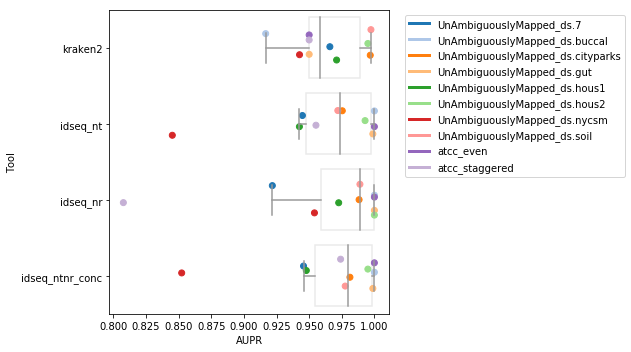

In [92]:
accent_colors = sns.color_palette("tab20",10)

plt.figure(figsize=(9,5))
bplot = sns.boxplot(y="variable", x="value", data=pd.melt(sub_df),
            boxprops=dict(alpha=.2),showfliers=False, color='white')

plt.scatter(sub_df['kraken2'],[0 + random.uniform(-.25, .25) for i in range(len(sub_df.index))], color=accent_colors)
plt.scatter(sub_df['idseq_nt'],[1 + random.uniform(-.25, .25) for i in range(len(sub_df.index))], color=accent_colors)
plt.scatter(sub_df['idseq_nr'],[2 + random.uniform(-.25, .25) for i in range(len(sub_df.index))],color=accent_colors)
plt.scatter(sub_df['idseq_ntnr_conc'],[3 + random.uniform(-.25, .25) for i in range(len(sub_df.index))],color=accent_colors)

plt.ylabel('Tool')
plt.xlabel('AUPR')

colors = accent_colors
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = sub_df.index
plt.legend(lines, labels, bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('output/Fig3_AUPRbydataset_sub.pdf')
plt.show()

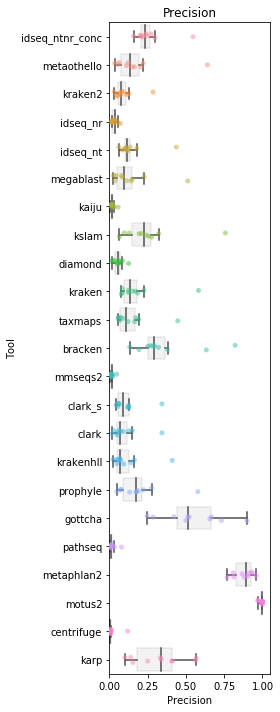

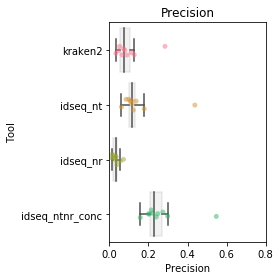

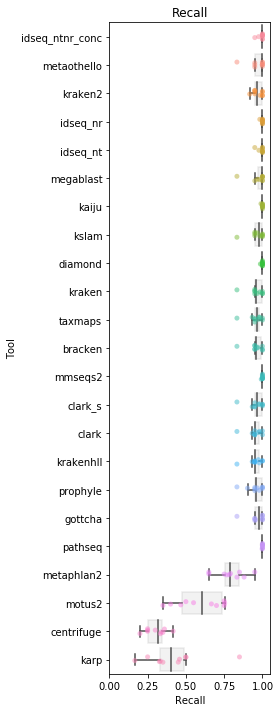

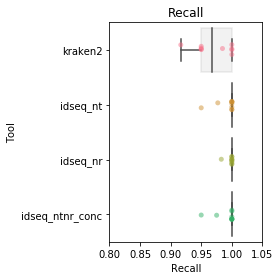

In [93]:

def create_boxplot(input_file, keep_order, title, saved_filename, figsize=(4,10), xlim=(0,1.05), subset=False):
    df = pd.read_csv(input_file, index_col = 0)
    
    # convert str values to float 
    for col in df.columns:
        df[col] = df[col].astype(float)

    if subset:
        df = df[['kraken2','idseq_nt','idseq_nr', 'idseq_ntnr_conc']]
    else:
        df = df[keep_order]
    plt.figure(figsize = figsize)
    sns.boxplot(y="variable", x="value", data=pd.melt(df), boxprops=dict(alpha=.1),showfliers=False, color='grey')
    sns.stripplot(y="variable", x="value", data=pd.melt(df), alpha=.5)
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel("Tool")
    plt.xlim(xlim)
    plt.tight_layout()
    plt.savefig(saved_filename)
    plt.show()

create_boxplot('data/output_precision.csv', keep_order, 'Precision', 'output/Fig3_precision_all.pdf')
create_boxplot('data/output_precision.csv', keep_order, 'Precision', 'output/Fig3_precision_sub.pdf', (4,4), (0,0.8), subset = True)


create_boxplot('data/output_recall.csv', keep_order, 'Recall', 'output/Fig3_recall_all.pdf')
create_boxplot('data/output_recall.csv', keep_order, 'Recall', 'output/Fig3_recall_sub.pdf', (4,4), (0.8,1.05), subset = True)

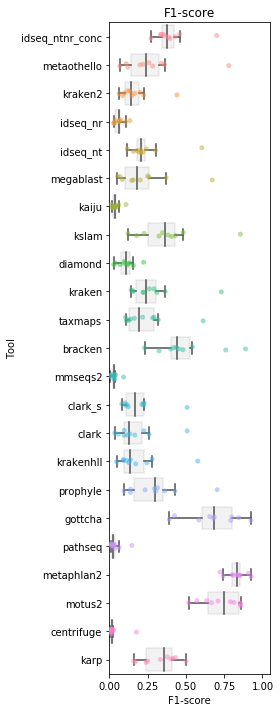

In [94]:
create_boxplot('data/output_f1.csv', keep_order, 'F1-score','output/Fig3_f1score_all.pdf')


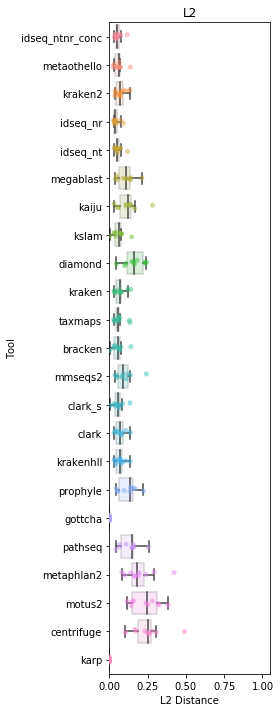

In [95]:
df = pd.read_csv('data/output_l2.csv', index_col = 0)

for col in df.columns:
    df[col] = df[col].astype(float)

# these two tools are not pesented in the cell benchmarks L2 analysis
df['karp'] = [0 for i in range(len(df.index))]
df['gottcha'] = [0 for i in range(len(df.index))]

df = df[keep_order]
plt.figure(figsize=(4,10))
sns.boxplot(y="variable", x="value", data=pd.melt(df), boxprops=dict(alpha=.2),showfliers=False)
sns.stripplot(y="variable", x="value", data=pd.melt(df), alpha=.5)
plt.xlim(0,1.05)
plt.title("L2")
plt.xlabel("L2 Distance")
plt.ylabel("Tool")
plt.tight_layout()
plt.savefig('output/Fig3_L2_all.pdf')